Recall the column_diagnosis.arff dataset from previous homeworks. For the following exercises,
normalize the data using sklearn’s MinMaxScaler

In [1]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.preprocessing import MinMaxScaler

# reading the ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 1.

[4v] Using sklearn, apply k-means clustering fully unsupervisedly on the normalized data with
𝑘 ∈ {2,3,4,5} (random=0 and remaining parameters as default). Assess the silhouette and purity of
the produced solutions.

In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics

k_val = [2, 3, 4, 5]

for k in k_val:
    # n_init = 10 just to supress the warnings, doesn't affect the results
    kmeans_model = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X_scaled)
    y_pred = kmeans_model.labels_
    
    print(f'k = {k}:')
    # compute silhouette
    silhouette = metrics.silhouette_score(X_scaled, y_pred)
    print('Silhouette Score: ', silhouette)
    
    # compute contingency/confusion matrix + purity score
    confusion_matrix = metrics.cluster.contingency_matrix(y, y_pred)
    purity_score = (np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix))
    print('Purity: ', purity_score)

k = 2:
Silhouette Score:  0.36044124340441114
Purity:  0.632258064516129
k = 3:
Silhouette Score:  0.29579055730002257
Purity:  0.667741935483871
k = 4:
Silhouette Score:  0.27442402122340176
Purity:  0.6612903225806451
k = 5:
Silhouette Score:  0.23823928397844843
Purity:  0.6774193548387096


# 2.
[2v] Consider the application of PCA after the data normalization: 
- i. Identify the variability explained by the top two principal components.  
- ii. For each one of these two components, sort the input variables by relevance by 
inspecting the absolute weights of the linear projection.

In [3]:
from sklearn.decomposition import PCA

# learn the transformation (components as linear combination of features)
pca = PCA(n_components=2)
pca.fit(X_scaled)

# access the explained variance (using eigenvalues)
print("\nExplained Variance Ratio:")
print("PC1:", pca.explained_variance_ratio_[0])
print("PC2:", pca.explained_variance_ratio_[1])

X_pca = pca.transform(X_scaled)
# 1 scale principal components
weight1 = pca.components_[0]
weight2 = pca.components_[1]

weights = pca.components_
sorted_weight_pc1 = [sorted(enumerate(weight1), key=lambda x: abs(x[1]), reverse=True)]
sorted_weight_pc2 = [sorted(enumerate(weight2), key=lambda x: abs(x[1]), reverse=True)]
sorted_weights = sorted_weight_pc1 + sorted_weight_pc2

for i, component in enumerate(sorted_weights):
    print(f"\nTop variables for PC{i + 1}:")
    for idx, weight in component:
        variable_name = X.columns[idx]
        print(f"{variable_name}: {weight:5f}")




Explained Variance Ratio:
PC1: 0.5618144484299207
PC2: 0.20955952591361904

Top variables for PC1:
pelvic_incidence: 0.591621
lumbar_lordosis_angle: 0.515085
pelvic_tilt: 0.467039
sacral_slope: 0.325689
degree_spondylolisthesis: 0.216930
pelvic_radius: -0.115824

Top variables for PC2:
pelvic_tilt: -0.670373
pelvic_radius: -0.581074
sacral_slope: 0.443303
pelvic_incidence: 0.100037
lumbar_lordosis_angle: 0.080047
degree_spondylolisthesis: 0.004583



# 3.
[2v] Visualize side-by-side the data using:
- 1) the ground diagnoses
- 2) the previously learned 𝑘 =3 clustering solution.
  
To this end, projected the normalized data onto a 2-dimensional data 
space using PCA and then color observations using the reference and cluster annotations.

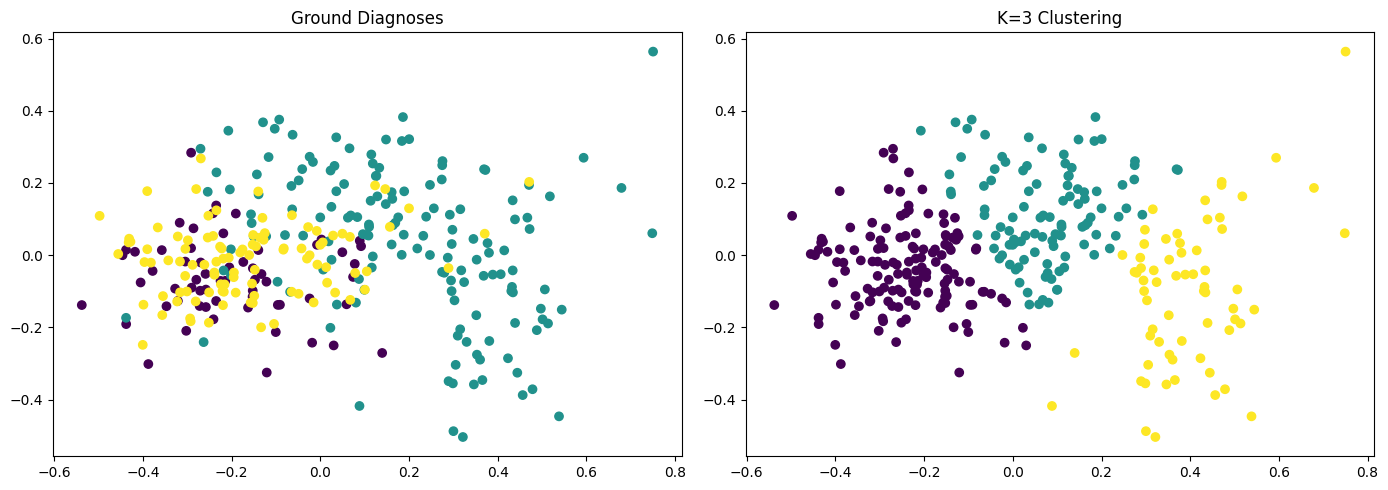

In [4]:
import matplotlib.pyplot as plt


kmeans_model = KMeans(n_clusters=3, random_state=0, n_init=10).fit(X_scaled)
X_pca = pca.fit_transform(X_scaled)

temp = {"Hernia": 0, "Spondylolisthesis": 1, "Normal": 2}
y1 = [temp[name] for name in y]

# Visualize the data
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y1)
plt.title('Ground Diagnoses')
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=kmeans_model.labels_)
plt.title('K=3 Clustering')

plt.tight_layout()
plt.show()

# 4.
Considering the results from questions (1) and (3), identify two ways on how clustering can 
be used to characterize the population of ill and healthy individuals.

Com base nos resultados obtidos nas questões 1 e 3, verificamos que o silhouette score diminui progressivamente, iniciando em 0.36 para k=2 e terminando em 0.23 em k=5; a purity aumenta de 0.63 para 0.66 entre k=2 e k=3, e permanece praticamente inalterada até k=5. Os melhores valores de k aparentam, então, ser 2 e 3, pois consistem nos valores em que existe um melhor tradeoff entre o silhouette score e a purity, correspondendo à quantidade de clusters que melhor encapsulam grupos de indivíduos com caraterísticas idênticas; neste contexto, o clustering com k=2 pode identificar claramente grupos de indivíduos doentes e saudáveis; para k=3, esta solução de clustering pode identificar um grupo de indivíduos saudáveis, e dois grupos de indivíduos que partilham diferentes problemas de saúde ou fatores de risco. Recorrendo à visualização dos dados produzida no exercício 3, observando o ground diagnoses e posteriormente o clustering k=3 podemos reforçar a ideia de que para k=3, a solução de clustering poderá ser utilizada para caraterizar populações de indivíduos saudáveis e doentes, observando-se três grupos claramente distintos e bem identificados, sendo que um deles será de indivíduos saudáveis (a azul), e os outros de indivíduos que possivelmente partilhem caraterísticas como mencionado acima (a amarelo e roxo). 
Ainda, para novas observações, esta solução de clustering pode ser utilizada para avaliar a probabilidade de um indivíduo estar doente ou saudável, atribuindo-o ao cluster que melhor o caracteriza. Por exemplo, se um novo indivíduo for atribuído ao cluster azul, é provável que esteja saudável, enquanto que se for atribuído a um dos clusters amarelo ou roxo, provavelmente terá algum problema de saúde ou fator de risco, dependendo do significado do cluster. Este tipo de classificação e a informação que providencia pode ser muito útil no contexto da avaliação inicial do estado de saúde de um indivíduo; deste modo, se forem necessárias avaliações médicas adicionais são realizadas mais rapidamente e são mais específicas.
